In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [9]:
def prettify_dates(df, column='created_at', fmt='%m-%d'):
    """ Transform datetime column to column of string-formatted dates """
    df[column] = df[column].dt.strftime('%m-%d')
    for i, value in enumerate(df[column]):
        df.loc[i, 'created_at'] = value.lstrip("0").replace(" 0", " ")
    return df

def truncate_sensor_name(df):
    """ Remove PA_II_ from sensor name"""
    for i, value in enumerate(df['sensor_name']):
        df.loc[i, 'sensor_name'] = value.replace("PA_II_", "")
    return df

In [75]:
def resample_by_sensor(df,fq):
    data = df.groupby([pd.Grouper(level='sensor_name'),pd.Grouper(level='created_at',freq=fq)]).mean()
    return data

In [83]:
import plotly.express as px

In [84]:
data = pd.read_parquet('../data/processed/PurpleAir daily individual.parquet')[['Channel A PM2.5 (ug/m3)']]

In [85]:
data = resample_by_sensor(data,fq='W')


In [86]:
data

Channel A PM2.5 (ug/m3)
sensor_name created_at                                        
PA_II_0D9C  2020-01-05 00:00:00-06:00                 9.096614
            2020-01-12 00:00:00-06:00                 6.481640
            2020-01-19 00:00:00-06:00                12.196245
            2020-01-26 00:00:00-06:00                 6.637451
            2020-02-02 00:00:00-06:00                 9.299689
...                                                        ...
PA_II_E6D8  2020-08-09 00:00:00-05:00                 5.764323
            2020-08-16 00:00:00-05:00                 5.135447
            2020-08-30 00:00:00-05:00                 4.606509
            2020-09-06 00:00:00-05:00                 7.669674
            2020-09-13 00:00:00-05:00                 6.663797

[487 rows x 1 columns]

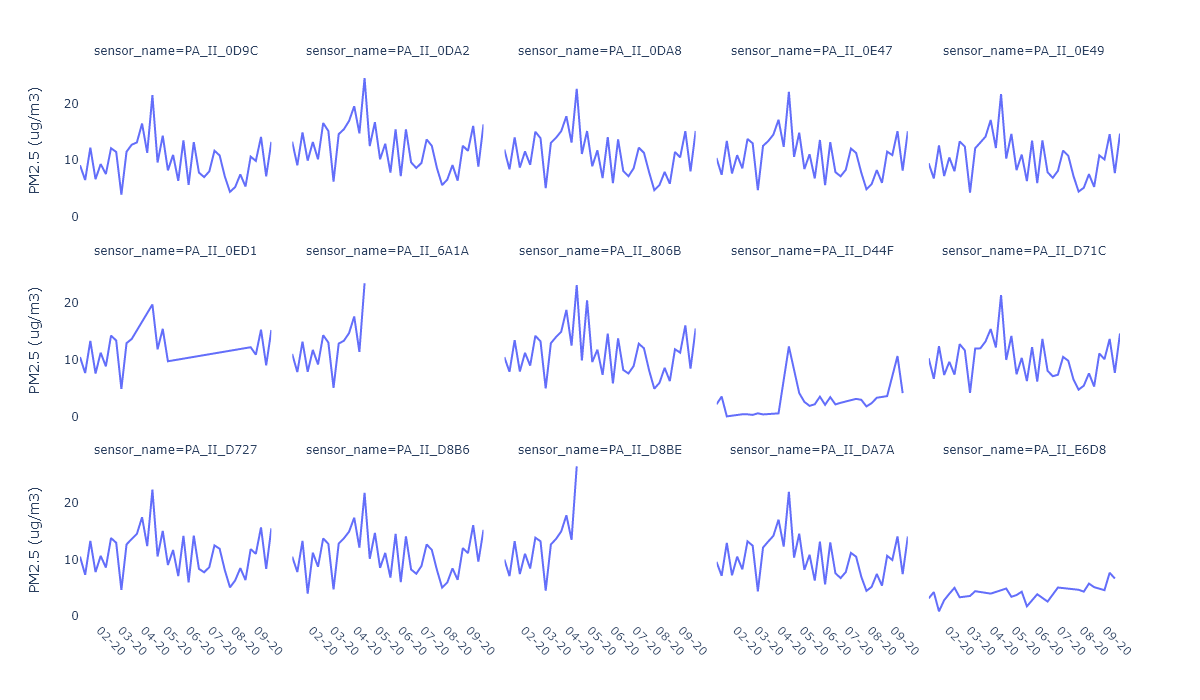

In [94]:
config = {'staticPlot': True}
labels = {'created_at':'','Channel A PM2.5 (ug/m3)':'PM2.5 (ug/m3)'}
fig = px.line(data.reset_index(), x="created_at",y="Channel A PM2.5 (ug/m3)",facet_col='sensor_name',facet_col_wrap=5,labels=labels, width=1200, height=700)
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.update_xaxes(
    tickangle=45,
    tickformat="%m-%y",
    nticks=10
)

# fig.show(config=config)
fig.show("png",width=1200, height=700)